In [127]:
import pandas as pd
from pandas import DataFrame, Series
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans as km
from sklearn.metrics import silhouette_samples, silhouette_score
import random

import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [128]:
TRIP_FILE = ('201508_trip_data.csv')
#WEATHER = ('201508_weather_data.csv')
#STATION_BALANCE = ('201508_status_data.csv')
STATION_DATA = ('201508_station_data.csv')

trip_data = pd.read_csv(TRIP_FILE)
#weather_data = pd.read_csv(WEATHER)
#station_balance_data = pd.read_csv(STATION_BALANCE)
station_data = pd.read_csv(STATION_DATA)

trip_data.head()

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
0,913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
1,913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032
2,913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107
3,913454,409,8/31/2015 23:10,San Jose City Hall,10,8/31/2015 23:17,San Salvador at 1st,8,68,Subscriber,95113
4,913453,789,8/31/2015 23:09,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,487,Customer,9069


In [129]:
station_data_sf = station_data[station_data.landmark == 'San Francisco'].copy()
station_data_sf.head()

,station_id,name,lat,long,dockcount,landmark,installation
32,41,Clay at Battery,37.795001,-122.399970,15,San Francisco,8/19/2013
33,42,Davis at Jackson,37.797280,-122.398436,15,San Francisco,8/19/2013
34,45,Commercial at Montgomery,37.794231,-122.402923,15,San Francisco,8/19/2013
35,46,Washington at Kearney,37.795425,-122.404767,15,San Francisco,8/19/2013
36,47,Post at Kearney,37.788975,-122.403452,19,San Francisco,8/19/2013


In [130]:
trip_data = trip_data.merge(station_data[['station_id', 'lat', 'long', 'landmark']], left_on = 'Start Terminal', right_on = 'station_id')
#trip_data.join(station_data, on='station_id')
trip_data = trip_data.merge(station_data[['station_id', 'lat', 'long']], left_on = 'End Terminal', right_on = 'station_id')

trip_data.head()

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code,station_id_x,lat_x,long_x,landmark,station_id_y,lat_y,long_y
0,913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139,50,37.795392,-122.394203,San Francisco,70,37.776617,-122.39526
1,913228,886,8/31/2015 18:47,Harry Bridges Plaza (Ferry Building),50,8/31/2015 19:02,San Francisco Caltrain (Townsend at 4th),70,387,Subscriber,94107,50,37.795392,-122.394203,San Francisco,70,37.776617,-122.39526
2,913009,725,8/31/2015 17:40,Harry Bridges Plaza (Ferry Building),50,8/31/2015 17:53,San Francisco Caltrain (Townsend at 4th),70,360,Subscriber,94111,50,37.795392,-122.394203,San Francisco,70,37.776617,-122.39526
3,912956,1034,8/31/2015 17:31,Harry Bridges Plaza (Ferry Building),50,8/31/2015 17:48,San Francisco Caltrain (Townsend at 4th),70,587,Subscriber,94087,50,37.795392,-122.394203,San Francisco,70,37.776617,-122.39526
4,912776,871,8/31/2015 16:50,Harry Bridges Plaza (Ferry Building),50,8/31/2015 17:04,San Francisco Caltrain (Townsend at 4th),70,371,Subscriber,94070,50,37.795392,-122.394203,San Francisco,70,37.776617,-122.39526


In [131]:
trip_data_sf = trip_data[trip_data.landmark == 'San Francisco'].copy()
trip_data_sf.head()

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code,station_id_x,lat_x,long_x,landmark,station_id_y,lat_y,long_y
0,913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139,50,37.795392,-122.394203,San Francisco,70,37.776617,-122.39526
1,913228,886,8/31/2015 18:47,Harry Bridges Plaza (Ferry Building),50,8/31/2015 19:02,San Francisco Caltrain (Townsend at 4th),70,387,Subscriber,94107,50,37.795392,-122.394203,San Francisco,70,37.776617,-122.39526
2,913009,725,8/31/2015 17:40,Harry Bridges Plaza (Ferry Building),50,8/31/2015 17:53,San Francisco Caltrain (Townsend at 4th),70,360,Subscriber,94111,50,37.795392,-122.394203,San Francisco,70,37.776617,-122.39526
3,912956,1034,8/31/2015 17:31,Harry Bridges Plaza (Ferry Building),50,8/31/2015 17:48,San Francisco Caltrain (Townsend at 4th),70,587,Subscriber,94087,50,37.795392,-122.394203,San Francisco,70,37.776617,-122.39526
4,912776,871,8/31/2015 16:50,Harry Bridges Plaza (Ferry Building),50,8/31/2015 17:04,San Francisco Caltrain (Townsend at 4th),70,371,Subscriber,94070,50,37.795392,-122.394203,San Francisco,70,37.776617,-122.39526


In [132]:
trip_data_sf.rename(columns={'station_id_x': 'start_station', 'lat_x': 'start_lat', 'long_x': 'start_long', 'station_id_y': 'end_station', 'lat_y': 'end_lat', 'long_y': 'end_long'}, inplace=True)
#trip_data_sf.drop('name', axis=1, inplace=True)
trip_data_sf.head()

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code,start_station,start_lat,start_long,landmark,end_station,end_lat,end_long
0,913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139,50,37.795392,-122.394203,San Francisco,70,37.776617,-122.39526
1,913228,886,8/31/2015 18:47,Harry Bridges Plaza (Ferry Building),50,8/31/2015 19:02,San Francisco Caltrain (Townsend at 4th),70,387,Subscriber,94107,50,37.795392,-122.394203,San Francisco,70,37.776617,-122.39526
2,913009,725,8/31/2015 17:40,Harry Bridges Plaza (Ferry Building),50,8/31/2015 17:53,San Francisco Caltrain (Townsend at 4th),70,360,Subscriber,94111,50,37.795392,-122.394203,San Francisco,70,37.776617,-122.39526
3,912956,1034,8/31/2015 17:31,Harry Bridges Plaza (Ferry Building),50,8/31/2015 17:48,San Francisco Caltrain (Townsend at 4th),70,587,Subscriber,94087,50,37.795392,-122.394203,San Francisco,70,37.776617,-122.39526
4,912776,871,8/31/2015 16:50,Harry Bridges Plaza (Ferry Building),50,8/31/2015 17:04,San Francisco Caltrain (Townsend at 4th),70,371,Subscriber,94070,50,37.795392,-122.394203,San Francisco,70,37.776617,-122.39526


In [133]:
list(trip_data_sf.columns.values)

['Trip ID',
 'Duration',
 'Start Date',
 'Start Station',
 'Start Terminal',
 'End Date',
 'End Station',
 'End Terminal',
 'Bike #',
 'Subscriber Type',
 'Zip Code',
 'start_station',
 'start_lat',
 'start_long',
 'landmark',
 'end_station',
 'end_lat',
 'end_long']

In [15]:
trip_sample = trip_data_sf.sample(frac=.01)
print(trip_sample)
print(type(trip_sample))

        Trip ID  Duration        Start Date  \
238071   536626      2481   11/9/2014 13:35   
199531   671838       802    3/6/2015 20:27   
235458   464598       727   9/22/2014 18:14   
216755   650224       363   2/19/2015 13:53   
255551   712078       374    4/4/2015 11:07   
202818   705635       322   3/31/2015 10:16   
163725   445467       245    9/9/2014 20:37   
35886    561222       171  11/30/2014 12:52   
102715   904474       657   8/25/2015 14:23   
248696   829123      1027   6/30/2015 19:13   
158230   592781       561    1/6/2015 13:12   
41633    888057       472    8/13/2015 8:48   
250273   778897        93   5/22/2015 20:42   
54146    594742       648    1/7/2015 16:32   
79983    573844       939  12/10/2014 17:56   
313204   696776       471    3/25/2015 8:55   
254309   800539       246    6/9/2015 17:30   
267837   793345       691     6/4/2015 7:46   
253435   660382      1475   2/26/2015 20:43   
4977     796378       336    6/5/2015 18:09   
209262   8448

In [17]:
trip_sample.to_csv("trip_sample.csv")

In [134]:
def measure_distance(start_lat, start_long, end_lat, end_long):
    x_difference = start_lat - end_lat
    y_difference = start_long - end_long
    x_squared = x_difference**2
    y_squared = y_difference**2
    added = x_squared + y_squared
    squart_root_ = np.sqrt(added)
    to_feet = squart_root_ * 2390.31 / 0.0082459784137541101
    return to_feet

In [135]:
def compute_distance_df(trip_data_sf, start_lat_name, start_long_name, end_lat_name, end_long_name):
    distances_list = []
    for row in trip_data_sf.index:
        distance_between_points = measure_distance(trip_data_sf[start_lat_name][row], trip_data_sf[start_long_name][row],\
                                trip_data_sf[end_lat_name][row], trip_data_sf[end_long_name][row])
        #print(distance_between_points)
        distances_list.append(distance_between_points)
        #print(distances_list)
    return distances_list

In [136]:
distances_list = compute_distance_df(trip_data_sf,"start_lat","start_long","end_lat","end_long")

In [137]:
trip_data_sf['distance_start_stop'] = distances_list

In [138]:
trip_data_sf.distance_start_stop

0           5451.037117
1           5451.037117
2           5451.037117
3           5451.037117
4           5451.037117
5           5451.037117
6           5451.037117
7           5451.037117
8           5451.037117
9           5451.037117
10          5451.037117
11          5451.037117
12          5451.037117
13          5451.037117
14          5451.037117
15          5451.037117
16          5451.037117
17          5451.037117
18          5451.037117
19          5451.037117
20          5451.037117
21          5451.037117
22          5451.037117
23          5451.037117
24          5451.037117
25          5451.037117
26          5451.037117
27          5451.037117
28          5451.037117
29          5451.037117
              ...      
321084      7664.845591
321085      7664.845591
321086      7664.845591
321087      7664.845591
321088      7664.845591
321089      7664.845591
321090      7664.845591
321091      7664.845591
321092      7664.845591
321093      7664.845591
321094      7664

In [139]:
#Converting 'str' objects to 'int'in col='Duration'
list(map(int, trip_data['Duration']))

[765,
 886,
 725,
 1034,
 871,
 649,
 641,
 920,
 666,
 1106,
 1181,
 1852,
 2189,
 2081,
 2075,
 2115,
 684,
 672,
 770,
 649,
 796,
 462,
 718,
 1041,
 675,
 779,
 718,
 893,
 1130,
 701,
 659,
 643,
 728,
 928,
 681,
 703,
 528,
 774,
 818,
 927,
 602,
 679,
 662,
 696,
 638,
 1104,
 661,
 623,
 587,
 694,
 925,
 671,
 853,
 710,
 552,
 676,
 520,
 990,
 770,
 779,
 807,
 979,
 995,
 792,
 836,
 1129,
 746,
 753,
 661,
 673,
 632,
 800,
 846,
 728,
 752,
 632,
 745,
 515,
 615,
 618,
 720,
 822,
 923,
 690,
 775,
 617,
 1065,
 662,
 743,
 895,
 677,
 589,
 697,
 843,
 660,
 881,
 806,
 1097,
 755,
 607,
 645,
 900,
 568,
 648,
 792,
 764,
 631,
 732,
 639,
 593,
 927,
 637,
 707,
 786,
 570,
 850,
 874,
 852,
 661,
 1163,
 853,
 694,
 858,
 622,
 604,
 702,
 698,
 1340,
 743,
 802,
 920,
 748,
 671,
 758,
 750,
 612,
 882,
 1096,
 930,
 626,
 635,
 577,
 716,
 502,
 962,
 907,
 959,
 676,
 619,
 814,
 486,
 796,
 1372,
 1349,
 684,
 786,
 1188,
 767,
 730,
 744,
 914,
 669,
 779,
 8

In [140]:
#Converting to datetime
trip_data['Start Date'] = pd.to_datetime(trip_data['Start Date'])
#trip_data['End Date'] = pd.to_datetime(trip_data['End Date'])

[-10, 4000, -10, 11000]

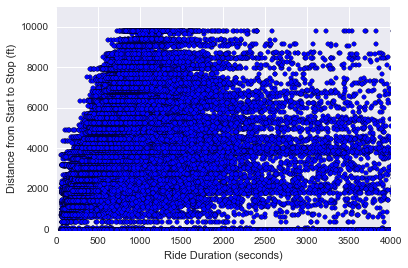

In [141]:
plt.scatter(trip_data_sf['Duration'], trip_data_sf['distance_start_stop'])
plt.xlabel('Ride Duration (seconds)')
plt.ylabel('Distance from Start to Stop (ft)')
plt.axis([-10, 4000, -10, 11000])
#plt.figure(figsize=(20,20))

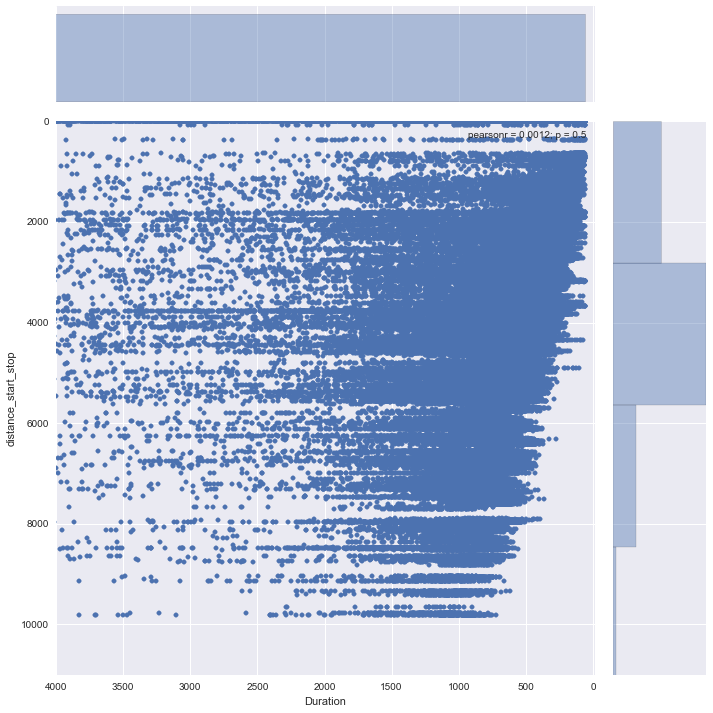

In [142]:
sns.jointplot(trip_data_sf['Duration'], trip_data_sf['distance_start_stop'], kind='scatter', size=10, xlim={-10, 4000}, ylim={-10,11000})

In [143]:
features = trip_data_sf[['Duration', 'distance_start_stop']].copy()
features['day_of_week'] = pd.DatetimeIndex(trip_data_sf['Start Date']).dayofweek
features['hours'] = pd.DatetimeIndex(trip_data_sf['Start Date']).hour

In [144]:
features.head()

,Duration,distance_start_stop,day_of_week,hours
0,765,5451.037117,0,23
1,886,5451.037117,0,18
2,725,5451.037117,0,17
3,1034,5451.037117,0,17
4,871,5451.037117,0,16


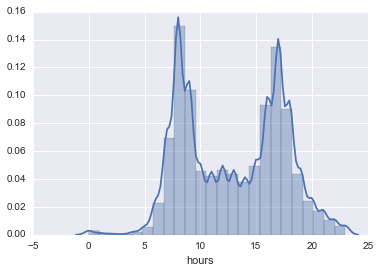

In [156]:
sns.distplot(features['hours'], bins=24, hist=True)
sns.

(array([ 57820.,  60517.,  59414.,  57324.,  52616.,  18752.,  14662.]),
 array([ 0.        ,  0.85714286,  1.71428571,  2.57142857,  3.42857143,
         4.28571429,  5.14285714,  6.        ]),
 <a list of 7 Patch objects>)

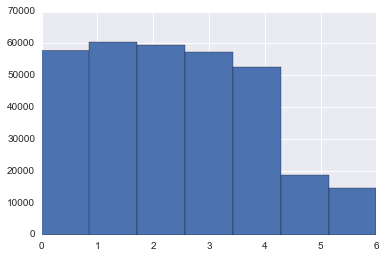

In [146]:
plt.hist(features['day_of_week'], bins=7)

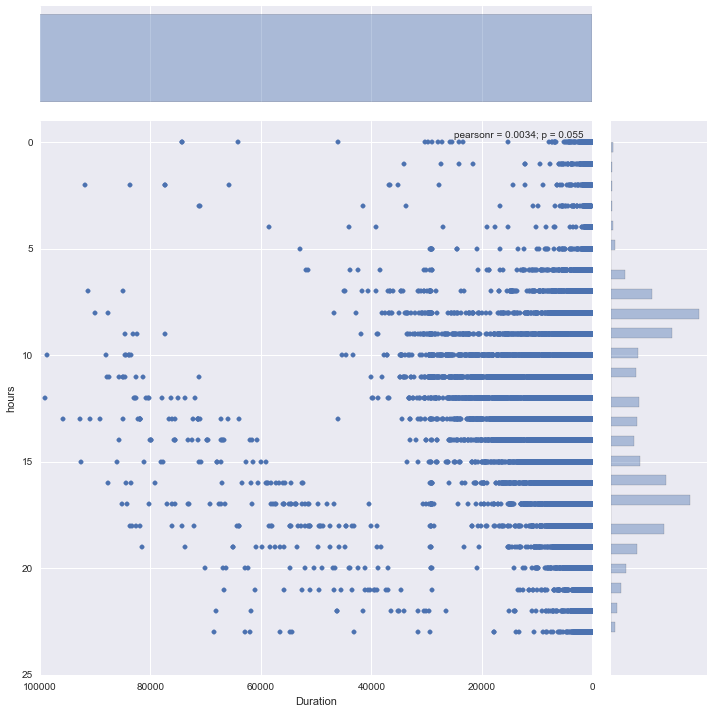

In [147]:
#plt.scatter(features.distance_start_stop, features.hours)
sns.jointplot(features.Duration, features.hours, kind='scatter', size=10, xlim={-1, 100000}, ylim={-1,25})

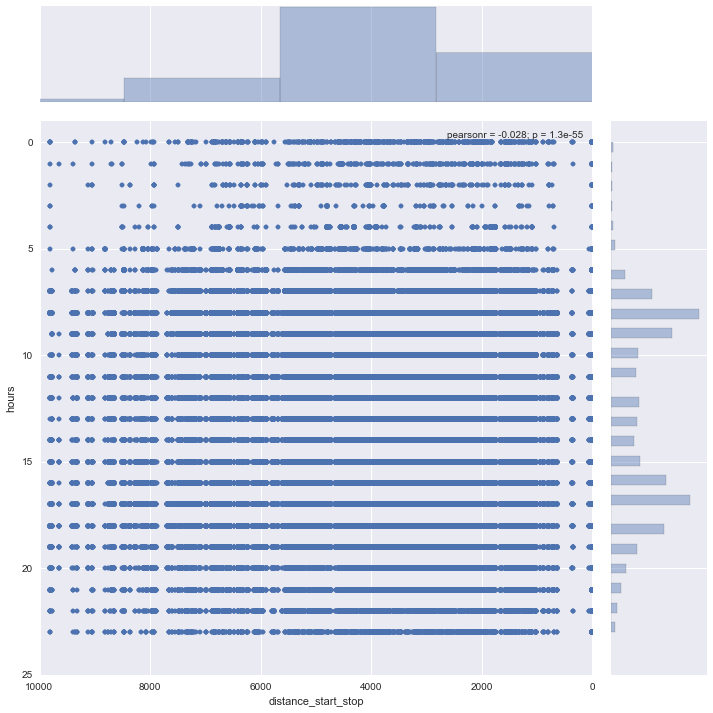

In [148]:
sns.jointplot(features.distance_start_stop, features.hours, kind='scatter', size=10, xlim={-1, 10000}, ylim={-1,25})

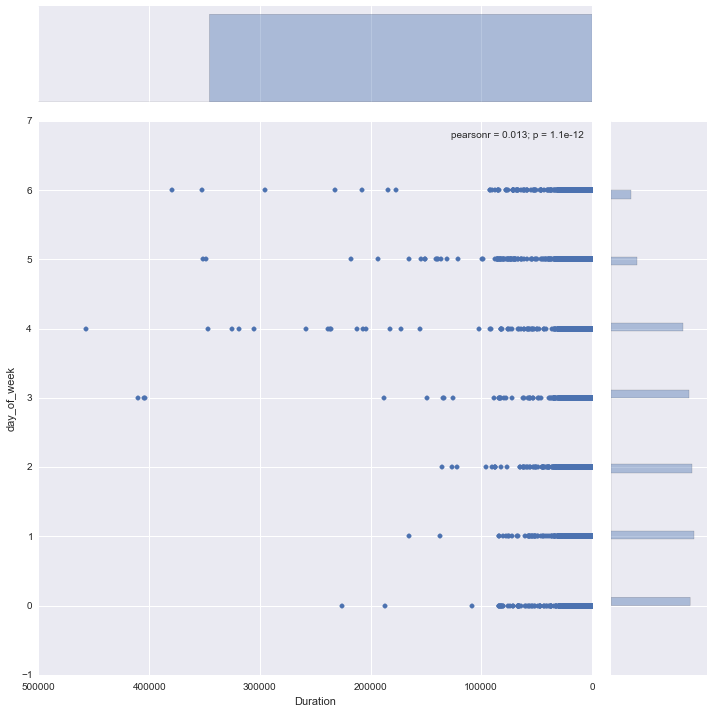

In [149]:
sns.jointplot(features.Duration, features.day_of_week, kind='scatter', size=10, xlim={-1, 500000}, ylim={-1,7})

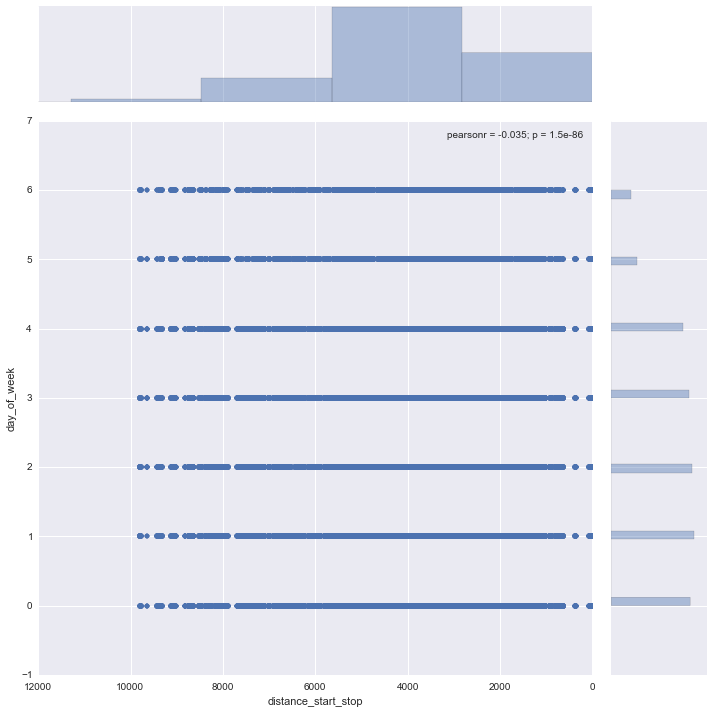

In [164]:
#sns.barplot(features.day_of_week, features.distance_start_stop)
sns.jointplot(features.distance_start_stop, features.day_of_week, kind='scatter', size=10, xlim={-1, 12000}, ylim={-1,7})

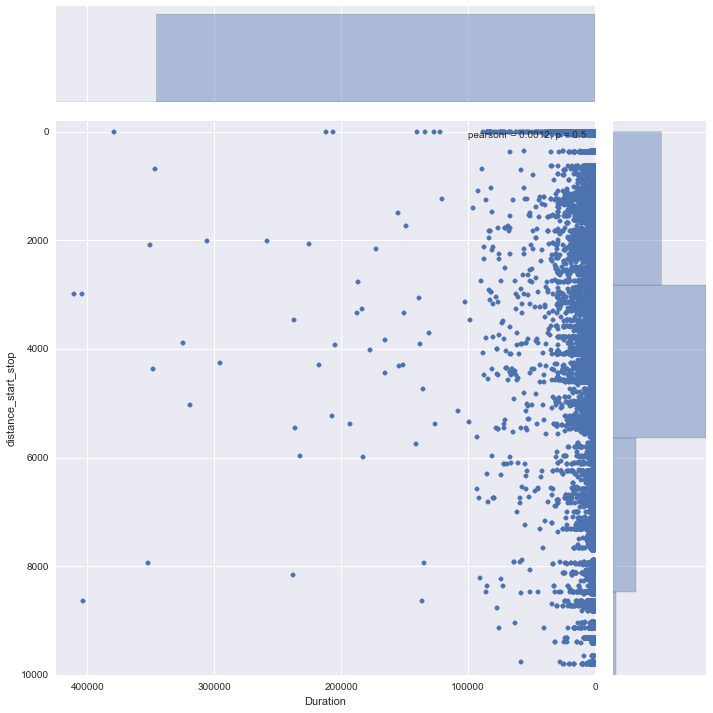

In [154]:
sns.jointplot(features.Duration, features.distance_start_stop, kind='scatter', size=10, xlim={-1, 425000}, ylim={-200,10000})